# London Restaurants - Recommander System

![title](logo.png)

## Data Cleaning

In [1]:
import pandas as pd 
import numpy as np

In [2]:
#dataframe regarding the restaurants
rpay = pd.read_csv('UCIML/chefmozaccepts.csv')
rcuisine = pd.read_csv('UCIML/chefmozcuisine.csv')
ropeninghours= pd.read_csv('UCIML/chefmozhours4.csv')
rparking = pd.read_csv('UCIML/chefmozparking.csv')
rlocation= pd.read_csv('UCIML/geoplaces2.csv')
                       
#ratings
ratings = pd.read_csv('UCIML/rating_final.csv')

#dataframe regarding the users 
ucuisine = pd.read_csv('UCIML/usercuisine.csv')
upay = pd.read_csv('UCIML/userpayment.csv')
uprofile = pd.read_csv('UCIML/userprofile.csv')                         

**Create a dataframe holding all information related to the restaurants**

Here is an example of a dataframe decribing the payment method by restaurant. There are many others holiding informations such as the opening hours, parking options. The objective is now to make only one dataframe out of those small ones to facilitate the data analysis. 

In [3]:
rpay.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [4]:
#the payment dataframe 
rpay[rpay ['Rpayment']=='Visa'] = 'VISA'
rpay.drop_duplicates(inplace=True)
payment= pd.get_dummies(rpay['Rpayment'])
result = pd.concat([rpay, payment], axis=1)

resto = result.groupby(['placeID'])['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Japan_Credit_Bureau', 'gift_certificates'].sum().reset_index()

resto[['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Japan_Credit_Bureau', 'gift_certificates']] = resto[['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Japan_Credit_Bureau', 'gift_certificates']].astype(bool) 
resto.head()

,placeID,cash,VISA,MasterCard-Eurocard,American_Express,bank_debit_cards,checks,Discover,Carte_Blanche,Diners_Club,Japan_Credit_Bureau,gift_certificates
0,132002,False,False,True,True,False,False,False,False,True,False,False
1,132012,False,False,False,True,True,False,False,False,True,False,False
2,132019,False,False,True,True,False,False,False,False,True,False,False
3,132023,False,False,False,True,True,False,False,False,True,True,False
4,132024,False,False,False,True,True,False,False,False,True,False,False


In [5]:
#the cuisine dataframe 
kk = pd.merge(rcuisine, resto, how ='left', on='placeID')
kk.head()

,placeID,Rcuisine,cash,VISA,MasterCard-Eurocard,American_Express,bank_debit_cards,checks,Discover,Carte_Blanche,Diners_Club,Japan_Credit_Bureau,gift_certificates
0,135110,Spanish,True,True,True,True,True,False,False,False,False,False,False
1,135109,Italian,True,False,False,False,False,False,False,False,False,False,False
2,135107,Latin_American,True,True,True,True,True,False,False,False,False,False,False
3,135106,Mexican,True,True,True,False,False,False,False,False,False,False,False
4,135105,Fast_Food,True,False,False,False,False,False,False,False,False,False,False


In [6]:
def opening(input):
    if input != 'None':
        a = input[:5]
        return a
    else:
        return input

def closing(input):
    if input != 'None':
        b = input[-6:-1] 
        return b 
    else:
        return input

In [7]:
#opening hours data frame 
cc = ropeninghours.pivot_table(index='placeID',columns='days',values='hours', aggfunc=lambda x: ' '.join(x))
cc.rename(columns={'Mon;Tue;Wed;Thu;Fri;': 'MondayToFriday', 'Sat;': 'Saturday','Sun;': 'Sunday'}, inplace=True)

cc.reset_index(inplace=True)

cc['MondayToFriday'] = cc['MondayToFriday'].astype(str)
cc['Saturday'] = cc['Saturday'].astype(str) 
cc['Sunday'] = cc['Sunday'].astype(str) 

cc['MFstart'] = cc['MondayToFriday'].apply(opening)
cc['MFend'] = cc['MondayToFriday'].apply(closing)

cc['Satstart'] = cc['Saturday'].apply(opening)
cc['Satend'] = cc['Saturday'].apply(closing)

cc['Sunstart'] = cc['Sunday'].apply(opening)
cc['Sunend'] = cc['Sunday'].apply(closing)

oo = pd.merge(cc, kk, how ='left', on='placeID')
oo.head()

,placeID,MondayToFriday,Saturday,Sunday,MFstart,MFend,Satstart,Satend,Sunstart,Sunend,...,VISA,MasterCard-Eurocard,American_Express,bank_debit_cards,checks,Discover,Carte_Blanche,Diners_Club,Japan_Credit_Bureau,gift_certificates
0,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00,...,False,False,True,True,False,False,False,True,False,False
1,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00,...,False,False,True,True,False,False,False,True,False,False
2,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00,...,False,False,True,True,False,False,False,True,True,False
3,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00,...,False,False,True,True,False,False,False,True,True,False
4,132024,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00,21:00,11:00,21:00,11:00,21:00,...,False,False,True,True,False,False,False,True,False,False


In [8]:
#parking data frame 
rparking.drop_duplicates(inplace=True)
parking= pd.get_dummies(rparking['parking_lot'])

result2 = pd.concat([rparking, parking], axis=1)

park = result2.groupby(['placeID'])['public', 'none', 'yes', 'valet parking', 'fee', 'street',
       'validated parking'].sum().reset_index()

pp = pd.merge(oo, park, how ='left', on='placeID')
pp.head()

,placeID,MondayToFriday,Saturday,Sunday,MFstart,MFend,Satstart,Satend,Sunstart,Sunend,...,Diners_Club,Japan_Credit_Bureau,gift_certificates,public,none,yes,valet parking,fee,street,validated parking
0,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00,...,True,False,False,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00,...,True,False,False,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00,...,True,True,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00,...,True,True,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,132024,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00,21:00,11:00,21:00,11:00,21:00,...,True,False,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#location dataframe 

rlocation.drop_duplicates(inplace=True)
restaurants = pd.merge(pp, rlocation, how ='left', on='placeID')
restaurants.drop(['MondayToFriday','Saturday','Sunday'], axis=1, inplace= True)
restaurants.drop_duplicates(inplace=True)
restaurants = restaurants.replace('?', np.nan)

restaurants[['public', 'none', 'yes', 'valet parking', 'fee', 'street',
       'validated parking']] = restaurants[['public', 'none', 'yes', 'valet parking', 'fee', 'street',
       'validated parking']].astype(bool) 

restaurants.tail()
#restaurants.drop(['parking_lot'], axis=1, inplace= True)

,placeID,MFstart,MFend,Satstart,Satend,Sunstart,Sunend,Rcuisine,cash,VISA,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
787,135107,07:00,23:30,07:00,23:30,07:00,23:30,Latin_American,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,135108,00:00,23:30,00:00,23:30,00:00,23:30,NaN,NaN,NaN,...,No_Alcohol_Served,none,informal,completely,low,NaN,familiar,f,closed,none
789,135109,08:00,21:00,08:00,21:00,08:00,21:00,Italian,True,False,...,Wine-Beer,not permitted,informal,no_accessibility,medium,NaN,quiet,f,closed,Internet
790,135110,08:00,19:00,00:00,00:00,00:00,00:00,Spanish,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,135111,00:00,23:30,00:00,23:30,00:00,23:30,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Create a dataframe holding all information related to the users**

In [10]:
ucuisine['Rcuisine'].unique()

array(['American', 'Mexican', 'Bakery', 'Breakfast-Brunch', 'Japanese',
       'Contemporary', 'Bagels', 'Cafe-Coffee_Shop',
       'Continental-European', 'Cafeteria', 'Family', 'Juice', 'Hawaiian',
       'Hot_Dogs', 'Latin_American', 'Korean', 'Italian', 'Diner',
       'Fast_Food', 'Deli-Sandwiches', 'Regional', 'Fusion', 'Portuguese',
       'Indian-Pakistani', 'Eastern_European', 'Lebanese', 'Moroccan',
       'Barbecue', 'Polynesian', 'Polish', 'Chinese', 'Pizzeria',
       'Burgers', 'Afghan', 'Middle_Eastern', 'Mongolian', 'Bar', 'Cuban',
       'Tex-Mex', 'Spanish', 'Soup', 'Sushi', 'Game', 'Doughnuts',
       'Australian', 'Asian', 'Dessert-Ice_Cream', 'Seafood', 'Turkish',
       'Organic-Healthy', 'Steaks', 'Mediterranean', 'British', 'Austrian',
       'Israeli', 'Russian-Ukrainian', 'Malaysian', 'Vegetarian',
       'Peruvian', 'Tapas', 'Eclectic', 'African', 'Basque', 'Canadian',
       'Irish', 'Southwestern', 'Tea_House', 'International',
       'Pacific_Northwest', '

In [11]:
ucuisine.drop_duplicates(inplace=True)
cui= pd.get_dummies(ucuisine['Rcuisine'])

result2 = pd.concat([ucuisine, cui], axis=1)

cc= result2.groupby(['userID'])['American', 'Mexican', 'Bakery', 'Breakfast-Brunch', 'Japanese',
       'Contemporary', 'Bagels', 'Cafe-Coffee_Shop',
       'Continental-European', 'Cafeteria', 'Family', 'Juice', 'Hawaiian',
       'Hot_Dogs', 'Latin_American', 'Korean', 'Italian', 'Diner',
       'Fast_Food', 'Deli-Sandwiches', 'Regional', 'Fusion', 'Portuguese',
       'Indian-Pakistani', 'Eastern_European', 'Lebanese', 'Moroccan',
       'Barbecue', 'Polynesian', 'Polish', 'Chinese', 'Pizzeria',
       'Burgers', 'Afghan', 'Middle_Eastern', 'Mongolian', 'Bar', 'Cuban',
       'Tex-Mex', 'Spanish', 'Soup', 'Sushi', 'Game', 'Doughnuts',
       'Australian', 'Asian', 'Dessert-Ice_Cream', 'Seafood', 'Turkish',
       'Organic-Healthy', 'Steaks', 'Mediterranean', 'British', 'Austrian',
       'Israeli', 'Russian-Ukrainian', 'Malaysian', 'Vegetarian',
       'Peruvian', 'Tapas', 'Eclectic', 'African', 'Basque', 'Canadian',
       'Irish', 'Southwestern', 'Tea_House', 'International',
       'Pacific_Northwest', 'German', 'Persian', 'Ethiopian', 'Romanian',
       'Cambodian', 'Pacific_Rim', 'Tunisian', 'Filipino', 'Dim_Sum',
       'Greek', 'Thai', 'Swiss', 'Cajun-Creole', 'Armenian', 'Indigenous',
       'Bar_Pub_Brewery', 'Caribbean', 'Indonesian', 'Hungarian',
       'Dutch-Belgian', 'Kosher', 'Fine_Dining', 'Jamaican', 'Tibetan',
       'Southeast_Asian', 'Burmese', 'California', 'Scandinavian',
       'Chilean', 'North_African', 'Vietnamese', 'French', 'Brazilian',
       'Southern'].sum().reset_index()

cc.head()

,userID,American,Mexican,Bakery,Breakfast-Brunch,Japanese,Contemporary,Bagels,Cafe-Coffee_Shop,Continental-European,...,Southeast_Asian,Burmese,California,Scandinavian,Chilean,North_African,Vietnamese,French,Brazilian,Southern
0,U1001,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U1002,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U1003,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U1004,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,U1005,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ucuisine['userID'].nunique()

138

In [13]:
upay['Upayment'].unique()

array(['cash', 'bank_debit_cards', 'MasterCard-Eurocard', 'VISA',
       'American_Express'], dtype=object)

In [14]:
upay.drop_duplicates(inplace=True)
pay= pd.get_dummies(upay['Upayment'])

result2 = pd.concat([upay,pay], axis=1)

pp= result2.groupby(['userID'])['cash', 'bank_debit_cards', 'MasterCard-Eurocard', 'VISA',
       'American_Express'].sum().reset_index()

aa = pd.merge(cc, pp, how ='left', on='userID')
aa.iloc[:,1:] = aa.iloc[:,1:].astype(bool) 
aa.head()

,userID,American,Mexican,Bakery,Breakfast-Brunch,Japanese,Contemporary,Bagels,Cafe-Coffee_Shop,Continental-European,...,North_African,Vietnamese,French,Brazilian,Southern,cash,bank_debit_cards,MasterCard-Eurocard,VISA,American_Express
0,U1001,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,U1002,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,U1003,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,U1004,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,True,False,False,False
4,U1005,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [15]:
users = pd.merge(aa, uprofile, how ='left', on='userID')


In [16]:
users.head()

,userID,American,Mexican,Bakery,Breakfast-Brunch,Japanese,Contemporary,Bagels,Cafe-Coffee_Shop,Continental-European,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,True,False,False,False,False,False,False,False,False,...,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,False,True,False,False,False,False,False,False,False,...,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,False,True,False,False,False,False,False,False,False,...,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,False,True,True,True,True,True,True,True,True,...,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,True,False,False,False,False,False,False,False,False,...,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [17]:
ratings.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [18]:
ratings.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


# EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Best rated restautants**

In [20]:
ratings.groupby('placeID')['rating'].mean().sort_values(ascending=False).head()

placeID
132955    2.000000
135034    2.000000
134986    2.000000
132922    1.833333
132755    1.800000
Name: rating, dtype: float64

**Restaurants having highest number of reviews**

In [21]:
ratings.groupby('placeID')['rating'].count().sort_values(ascending=False).head()

placeID
135085    36
132825    32
135032    28
132834    25
135052    25
Name: rating, dtype: int64

In [22]:
restaurants[restaurants['placeID']==135085]['Rcuisine']

745    Fast_Food
Name: Rcuisine, dtype: object

**Calculate the average rating by restaurant**

In [23]:
ra= pd.DataFrame(ratings.groupby('placeID')['rating'].mean())
ra.head()

,rating
placeID,
132560,0.50
132561,0.75
132564,1.25
132572,1.00
132583,1.00


In [24]:
re= pd.DataFrame(ratings.groupby('userID')['rating'].mean())
re = re.reset_index().head()

**Creating a new dataframe with the average rating and number of total ratings by restaurant**

In [25]:
ra['num of ratings'] = pd.DataFrame(ratings.groupby('placeID')['rating'].count())
ra.head()

,rating,num of ratings
placeID,,
132560,0.50,4
132561,0.75,4
132564,1.25,4
132572,1.00,15
132583,1.00,4


**Histogram (Number of Ratings)**

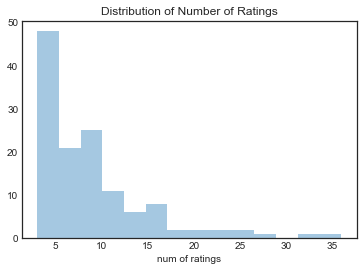

In [26]:
g = sns.distplot(ra['num of ratings'],kde=False)
g.set_title('Distribution of Number of Ratings');

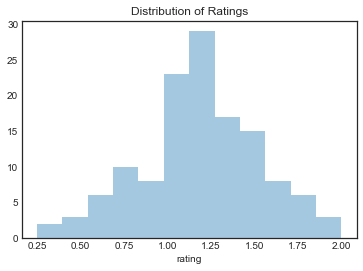

In [27]:
g = sns.distplot(ra['rating'],kde=False)
g.set_title('Distribution of Ratings');

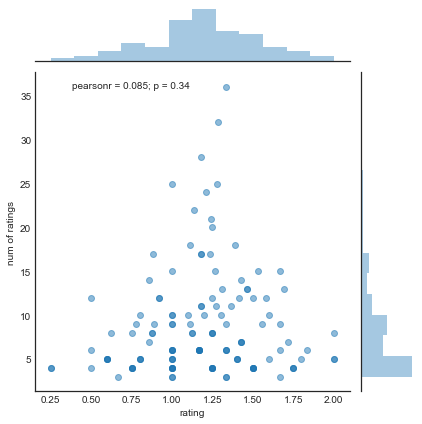

In [28]:
g = sns.jointplot(x='rating',y='num of ratings',data=ra,alpha=0.5);

**Number of restaurants by cuisine**

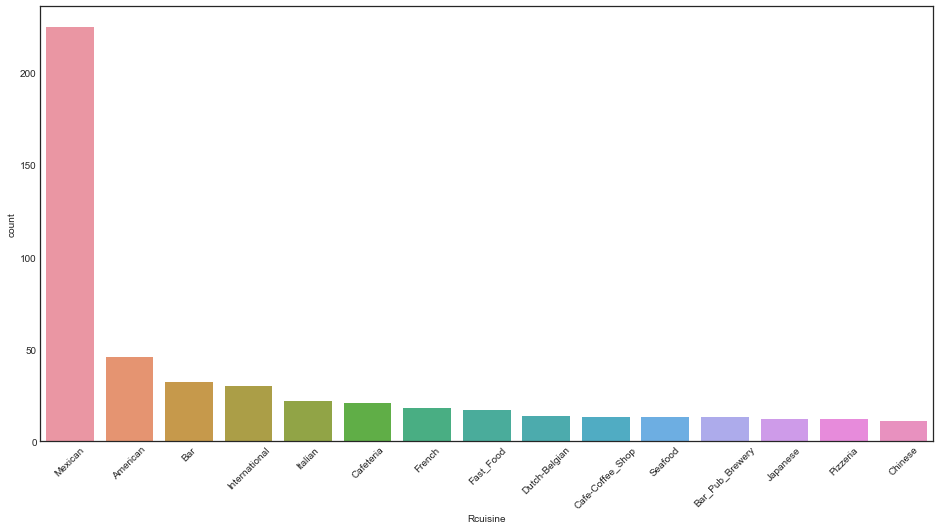

In [30]:
plt.figure(figsize = (16,8))
sns.countplot(x='Rcuisine', data=restaurants,  order=restaurants['Rcuisine'].value_counts().head(15).index)
plt.xticks(rotation=45);

**Review count by year of birth of the user**

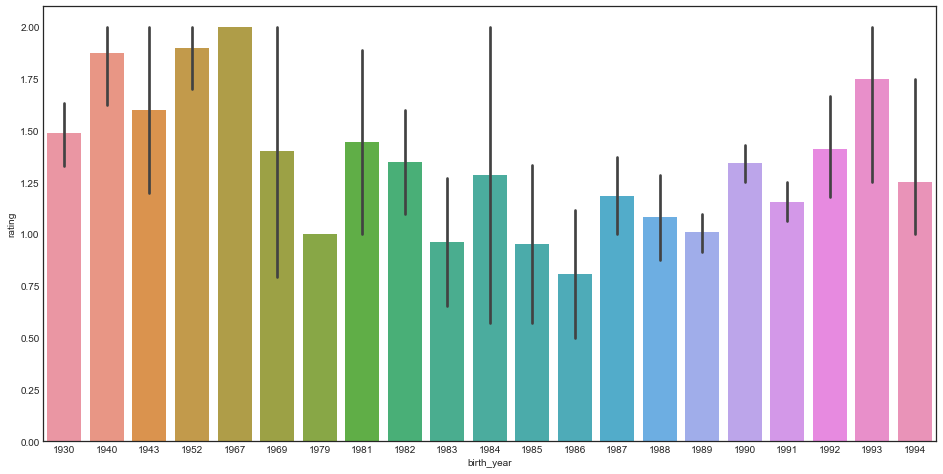

In [33]:
plt.figure(figsize = (16,8))
sns.barplot(x='birth_year',y='rating', data= z);

**Price vs rating**

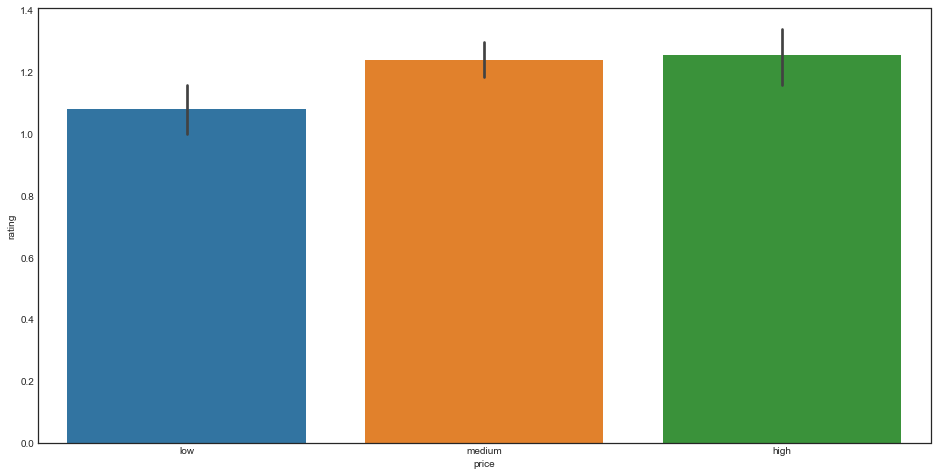

In [34]:
plt.figure(figsize = (16,8))
sns.barplot(x='price',y='rating', data= m);

**Mean of payment and rating**

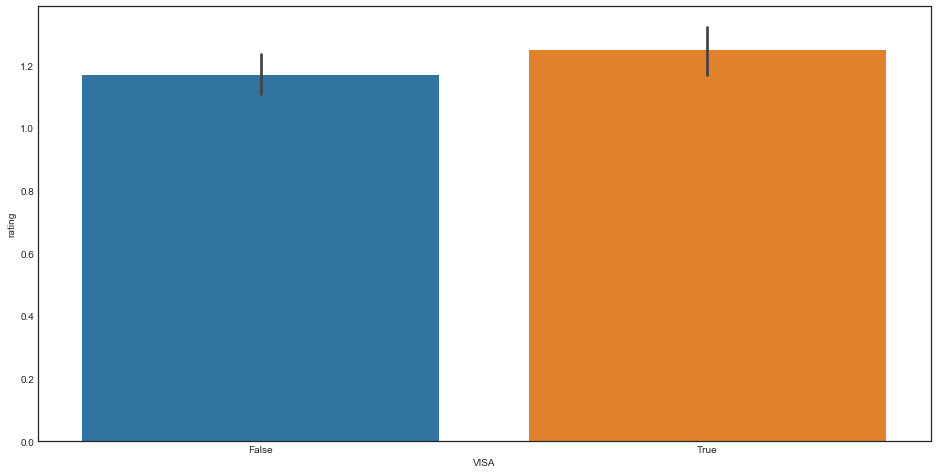

In [35]:
plt.figure(figsize = (16,8))
sns.barplot(x='VISA',y='rating', data= m);

**City location and rating**

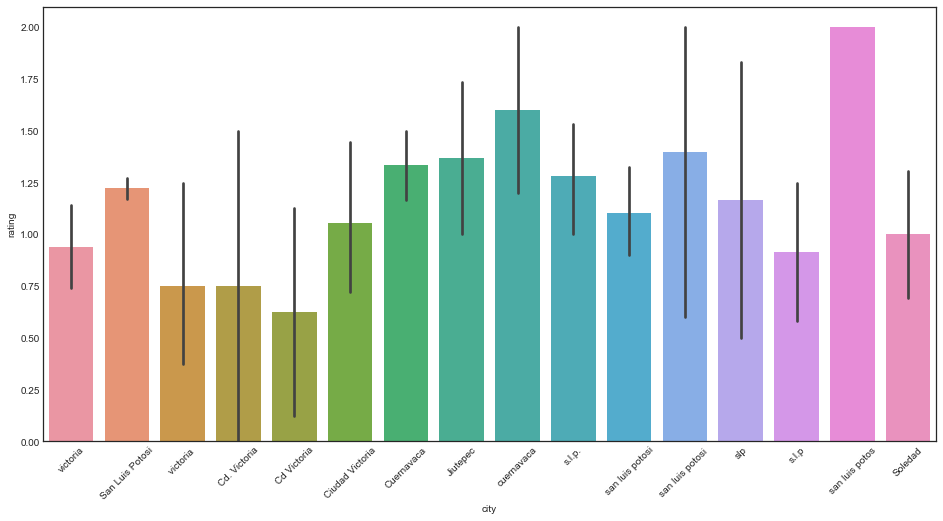

In [36]:
plt.figure(figsize = (16,8))
sns.barplot(x='city',y='rating', data= m)
plt.xticks(rotation=45);

# Recommending Similar Restaurants

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
u = ratings['userID'].tolist()
p = ratings['placeID'].tolist()
a =pd.DataFrame([str(x) + str(y) for x in u for y in p])
ratings['OrderID'] = a[0]

In [50]:
ratings.head()

,userID,placeID,rating,food_rating,service_rating,OrderID
0,U1077,135085,2,2,2,U1077135085
1,U1077,135038,2,2,1,U1077135038
2,U1077,132825,2,2,2,U1077132825
3,U1077,135060,1,2,2,U1077135060
4,U1068,135104,1,1,2,U1077135104


In [62]:
ratings['placeID'] = ratings['placeID'].astype(str)

In [63]:
df= ratings[['userID','placeID']]
df.columns = ('OrderID','Features')
df = pd.DataFrame(df.groupby('OrderID')['Features'].apply(list))
df['Features'] =df['Features'].apply(', '.join)
df.head()

**Vectorization of features**

,Features
OrderID,
U1001,"132830, 132825, 135085, 135040, 135039, 135045..."
U1002,"132921, 135062, 135106, 132825, 135052, 132862..."
U1003,"135064, 132825, 135075, 132862, 135041, 132937..."
U1004,"135060, 135028, 135106, 135062, 135032, 132954..."
U1005,"135050, 135076, 132830, 135066, 135041, 135057..."


In [69]:
vectorizer = CountVectorizer(tokenizer=lambda features: features.split(","), lowercase=False)
orderFeatureMatrix = vectorizer.fit_transform(df['Features'])
featureList = vectorizer.get_feature_names() 
orderFeatureMatrixDF = pd.DataFrame(orderFeatureMatrix.todense(), index=None, columns=featureList)
orderFeatureMatrixDF.head()

,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135074,135075,135076,135079,135081,135085,135086,135088,135104,135108
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Matrix transposition**

In [70]:
orderFeatureMatrixDF.T.head()

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
132560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132561,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
132564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132572,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
132583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Calculating cosine similarity**

In [71]:
similarityMatrix = cosine_similarity(orderFeatureMatrix.T)
featureList = orderFeatureMatrixDF.T.index.tolist()
similarityMatrixDF = pd.DataFrame(similarityMatrix, index=featureList, columns=featureList)
similarityMatrixDF.head()

,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135074,135075,135076,135079,135081,135085,135086,135088,135104,135108
132560,1.0,0.0,0.0,0.0,0.0,0.25,0.67082,0.500000,0.447214,0.204124,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
132561,0.0,1.0,0.0,0.0,0.0,0.00,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
132564,0.0,0.0,1.0,0.0,0.0,0.00,0.00000,0.288675,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
132572,0.0,0.0,0.0,1.0,0.0,0.00,0.00000,0.000000,0.000000,0.000000,...,0.0,0.267261,0.0,0.188982,0.0,0.0,0.0,0.000000,0.0,0.267261
132583,0.0,0.0,0.0,0.0,1.0,0.00,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.288675,0.0,0.000000


**Calculating feature take rates**

In [111]:
featureTakeratesDF = pd.DataFrame(featureList, columns=['Features'])
featureTakeratesDF['Takerate'] = orderFeatureMatrixDF.mean().values
featureTakeratesDF.head()

,Features,Takerate
0,132560,0.028986
1,132561,0.028986
2,132564,0.021739
3,132572,0.101449
4,132583,0.028986


**Calculating scores for a specific order**


In [84]:
#################################################################
currentOrderFeatures = '135060, 135028, 135106'
currentOrderFeatureCount = len(currentOrderFeatures.split(','))
#################################################################

def FeatureInFeatureList(Feature, currentOrderFeatures):
    return (",{},".format(Feature)) in ",{},".format(currentOrderFeatures)

def CalculateScore(row, featureTakeratesDF, currentOrderFeatureCount):
    score = sum(row.values * featureTakeratesDF['CurrentOrder'].values * (featureTakeratesDF['Takerate'].values))
    score = score / currentOrderFeatureCount
    return score

featureTakeratesDF['CurrentOrder'] = featureTakeratesDF.apply(lambda feature: 1 if FeatureInFeatureList(feature[0], currentOrderFeatures) else 0, axis = 1)
similarityMatrixDF['Score'] = similarityMatrixDF.apply(lambda row: -1 if FeatureInFeatureList(row.name, currentOrderFeatures) else CalculateScore(row, featureTakeratesDF, currentOrderFeatureCount))

In [85]:
featureTakeratesDF.head()

,Features,Takerate,CurrentOrder
0,132560,0.028986,0
1,132561,0.028986,0
2,132564,0.021739,0
3,132572,0.101449,0
4,132583,0.028986,0


In [86]:
similarityMatrixDF.head()

,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135075,135076,135079,135081,135085,135086,135088,135104,135108,Score
132560,1.0,0.0,0.0,0.0,0.0,0.25,0.67082,0.500000,0.447214,0.204124,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
132561,0.0,1.0,0.0,0.0,0.0,0.00,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
132564,0.0,0.0,1.0,0.0,0.0,0.00,0.00000,0.288675,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
132572,0.0,0.0,0.0,1.0,0.0,0.00,0.00000,0.000000,0.000000,0.000000,...,0.267261,0.0,0.188982,0.0,0.0,0.0,0.000000,0.0,0.267261,0.009288
132583,0.0,0.0,0.0,0.0,1.0,0.00,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.288675,0.0,0.000000,0.000000


In [107]:
#################################################################
currentOrderFeatures_2 = '135086'
currentOrderFeatureCount_2 = len(currentOrderFeatures_2.split(','))
#################################################################

featureTakeratesDF['CurrentOrder'] = featureTakeratesDF.apply(lambda feature: 1 if FeatureInFeatureList(
feature[0], currentOrderFeatures_2) else 0, axis = 1)
similarityMatrixDF['Score'] = similarityMatrixDF.apply(lambda row: -1 if FeatureInFeatureList(row.name, currentOrderFeatures) else CalculateScore(row, featureTakeratesDF, currentOrderFeatureCount_2))

similarityMatrixDF


,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135075,135076,135079,135081,135085,135086,135088,135104,135108,Score
132560,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.670820,0.500000,0.447214,0.204124,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
132561,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
132564,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.288675,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
132572,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.267261,0.000000,0.188982,0.0,0.0,0.000000,0.000000,0.000000,0.267261,0.000000
132583,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.288675,0.000000,0.000000,0.000000
132584,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.447214,0.500000,0.447214,0.204124,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
132594,0.670820,0.000000,0.000000,0.000000,0.000000,0.447214,1.000000,0.670820,0.400000,0.365148,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.447214,0.000000,0.000000
132608,0.500000,0.000000,0.288675,0.000000,0.000000,0.500000,0.670820,1.000000,0.447214,0.408248,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
132609,0.447214,0.000000,0.000000,0.000000,0.000000,0.447214,0.400000,0.447214,1.000000,0.547723,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
132613,0.204124,0.000000,0.000000,0.000000,0.000000,0.204124,0.365148,0.408248,0.547723,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


**Ranking / sorting of scores**

In [108]:
rankingDF = pd.DataFrame(index=similarityMatrixDF.index)
rankingDF['Ranking'] = 0
rankingDF['Restaurant_Code'] = rankingDF.index
rankingDF['Score'] = similarityMatrixDF['Score'].values
rankingDF = rankingDF[rankingDF['Score'] > 0].sort_values(by = 'Score', ascending = False)
rankingDF['Ranking'] = range(1,rankingDF.index.size + 1)
rankingDF

,Ranking,Restaurant_Code,Score
135086,1,135086,0.007246
135035,2,135035,0.003623
135049,3,135049,0.003623
132884,4,132884,0.002958
135055,5,135055,0.002739
132723,6,132723,0.002092
